In [1]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# load .env file
load_dotenv()

# Load connection string
connection_string = os.getenv('DENKMAL_POSTGRES')

engine = create_engine(connection_string)

def display_sql(query):
    df = pd.read_sql(query, engine)
    display(df)

def return_df(query):
    df = pd.read_sql(query, engine)
    return df

In [2]:
display_sql("SELECT tablename FROM pg_tables WHERE schemaname='public';")

tablename
0                  venueAliases
1                       regions
2  event_versions_genres_genres
3                        venues
4                 eventVersions
5                        events
6                    migrations
7                         users
8               genreCategories
9                        genres

## Unique Identifiers

In [3]:
# load eventVersions
df_versions = return_df('SELECT * FROM "eventVersions" ORDER BY "createdAt" DESC')

In [4]:
# load events
df_events = return_df('SELECT * FROM "events"')

In [5]:
df_events.head()

id                  createdAt  \
0  e7349970-2b0d-4daf-b626-0520bb3ee167 2019-04-27 11:13:07.410637   
1  5493a464-0025-406a-b7f9-ad394229dace 2019-04-27 11:13:07.472136   
2  a334d128-ccb0-44c4-9596-b01b00999867 2019-04-27 11:13:07.532277   
3  94c9117e-7eb9-4cf0-bc31-b1344a7e266b 2019-04-27 11:13:07.586490   
4  cf70e5a5-b41c-4fdf-b308-f6728c490d17 2019-04-27 11:13:33.677127   

                   updatedAt  isHidden  isPromoted  \
0 2019-04-27 11:13:07.410637     False       False   
1 2019-04-27 11:13:07.472136     False       False   
2 2019-04-27 11:13:07.532277     False       False   
3 2019-04-27 11:13:07.586490     False       False   
4 2019-04-27 11:13:33.677127     False       False   

                               regionId                       activeVersionId  \
0  d34cc52d-7f88-4730-8917-f3a4b5d4f62b  ba943bbe-ae7d-4a14-b6cc-bae59366d2b6   
1  d34cc52d-7f88-4730-8917-f3a4b5d4f62b  4ef818ea-d8fa-4d72-89b0-c85128d1cf86   
2  d34cc52d-7f88-4730-8917-f3a4b5d4f62b  54cbfd26-dd56-4153-8420-6d1bd687cc6a   
3  d34cc52d-7f88-4730-8917-f3a4b5d4f62b  e77408ab-fbc0-4448-8209-37c0a3f0920e   
4  d34cc52d-7f88-4730-8917-f3a4b5d4f62b  51dafccf-488f-4174-84d0-d5ca25a2fef0   

                                venueId  
0  a9547bab-27f5-449d-80ae-4e355fd6b40a  
1  5da4b6fd-bc4f-4a33-b052-49e0fa247fcc  
2  90b7dffa-bff3-4325-b0dc-ff8b3dc8d25b  
3  42634a2c-23bf-4ca8-961b-7d2beccb1871  
4  86f55af4-4acd-4ee0-810d-eea852ab1adf

In [6]:
df_versions.head()

id                  createdAt  \
0  6e1709df-b604-4b47-b609-d397214e2bd9 2024-05-05 11:14:58.835170   
1  1eeb8d9a-25b2-4c04-9480-c05022fecbeb 2024-05-05 11:07:44.530752   
2  9444d49d-1c2f-41d4-adb4-d541fb781477 2024-05-05 08:50:01.993946   
3  77697a52-5c3a-490a-a786-4c36eafc8f13 2024-05-05 08:49:45.428105   
4  2de95998-d0e5-4847-9006-e714e6a316d1 2024-05-05 08:49:37.249971   

                   updatedAt                from until  \
0 2024-05-05 11:14:58.835170 2024-05-30 17:00:00   NaT   
1 2024-05-05 11:07:44.530752 2024-05-11 18:00:00   NaT   
2 2024-05-05 08:50:01.993946 2024-05-14 18:30:00   NaT   
3 2024-05-05 08:49:45.428105 2024-05-14 18:30:00   NaT   
4 2024-05-05 08:49:37.249971 2024-05-14 17:00:00   NaT   

                                         description  isReviewPending  \
0  Näch am Wasser presents:\n\nMassa Nera (Scream...             True   
1                      Luis Cruz (Karussell Records)             True   
2                                        Mica Millar             True   
3                                  Dino Brandão: < 3             True   
4                                        Coach Party             True   

   hasTime                                              links  sourceType  \
0     True  [{"label":"Facebook","url":"https://www.facebo...  Suggestion   
1     True                                                 []  Suggestion   
2     True  [{"label":"Moods","url":"https://www.moods.ch/...     Scraper   
3     True                                                 []     Scraper   
4     True  [{"label":"Exil","url":"https://exil.club/even...     Scraper   

  sourceIdentifier                                    sourceUrl  \
0       Suggestion                                         None   
1       Suggestion                                         None   
2     zurich:moods  https://www.moods.ch/mica-millar-2024-05-14   
3  zurich:helsinki                 https://www.helsinkiklub.ch/   
4      zurich:exil         https://exil.club/events/coach-party   

   sourcePriority                               eventId  tags  
0             NaN  3e5bdf89-bdbc-4cbc-be09-fc4852507d7d  None  
1             NaN  f5e1cd0d-b049-4a27-8660-a5ed9fc031c1  None  
2            30.0  539ce2ab-5208-414c-9464-b4a1fa876bf2  None  
3            30.0  fbc9ae92-5b52-4bb2-84e9-2f987bbaa249  None  
4            30.0  5485757c-5c94-4bb1-94d5-c25448eab4c6  None

In [7]:
df_events['id'].nunique()

100158

In [8]:
df_versions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207576 entries, 0 to 207575
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                207576 non-null  object        
 1   createdAt         207576 non-null  datetime64[ns]
 2   updatedAt         207576 non-null  datetime64[ns]
 3   from              207576 non-null  datetime64[ns]
 4   until             49851 non-null   datetime64[ns]
 5   description       207576 non-null  object        
 6   isReviewPending   207576 non-null  bool          
 7   hasTime           207576 non-null  bool          
 8   links             207576 non-null  object        
 9   sourceType        207576 non-null  object        
 10  sourceIdentifier  117066 non-null  object        
 11  sourceUrl         140915 non-null  object        
 12  sourcePriority    140915 non-null  float64       
 13  eventId           207576 non-null  object        
 14  tags

In [9]:
df_event_per_SI = df_versions.groupby('sourceIdentifier')['eventId'].nunique().reset_index()
df_event_per_SI.rename(columns={'eventId': 'unique_event_count'}, inplace=True)
df_event_per_SI = df_event_per_SI.sort_values('unique_event_count', ascending=False)
df_event_per_SI

sourceIdentifier  unique_event_count
96                 basel:programmzeitung               11322
0                             Suggestion               10261
149             zurich:ubwg-city:zuerich                8909
148     zurich:stadtkonzerte-city:Zürich                8213
98        basel:stadtkonzerte-city:Basel                4028
..                                   ...                 ...
73    basel:facebookpage-481012125438250                   2
79    basel:facebookpage-552189928296464                   2
107  zurich:facebookpage-117899471584149                   1
93    basel:facebookpage-901923513200683                   1
100                        basel:tikibar                   1

[155 rows x 2 columns]

In [10]:
# Filter rows where 'sourceIdentifier' contains "facebook"
df_filtered = df_versions[~df_versions['sourceIdentifier'].str.contains("facebook", case=False, na=False)]
df_filtered_event_per_SI = df_filtered.groupby('sourceIdentifier')['eventId'].nunique().reset_index()
df_filtered_event_per_SI.rename(columns={'eventId': 'unique_event_count'}, inplace=True)
df_filtered_event_per_SI = df_filtered_event_per_SI.sort_values('unique_event_count', ascending=False)
df_filtered_event_per_SI

sourceIdentifier  unique_event_count
3                      basel:programmzeitung               11322
0                                 Suggestion               10261
33                  zurich:ubwg-city:zuerich                8909
32          zurich:stadtkonzerte-city:Zürich                8213
5             basel:stadtkonzerte-city:Basel                4028
4                                basel:renee                1717
8                      basel:ubwg-city:basel                1560
25                              zurich:moods                1326
12                               zurich:exil                1042
38                            zurich:zukunft                1012
24                           zurich:mehrspur                 934
16                           zurich:helsinki                 867
29                         zurich:rotefabrik                 712
9                         zurich:ambossrampe                 551
10                             zurich:dynamo                 545
37                               zurich:xtra                 489
35                       zurich:usgang-12573                 468
2                            basel:kaschemme                 463
23                           zurich:mascotte                 378
36                                zurich:wim                 339
34                       zurich:usgang-11848                 327
21                         zurich:kontikibar                 308
17                               zurich:hive                 260
30             zurich:squatradar-city:Zurich                 257
11                            zurich:ellokal                 254
27                              zurich:plaza                 199
19                               zurich:kauz                 179
14                              zurich:gonzo                 174
13                       zurich:friedasbuexe                 160
15                          zurich:heldenbar                 134
6                                basel:sääli                 129
31  zurich:squatradar-country:CH-city:Zurich                 118
20                              zurich:klaus                  73
18                              zurich:kater                  67
28                         zurich:provitreff                  62
26                          zurich:parkplatz                  51
1                             basel:hulaclub                  11
22                       zurich:kulturfolger                   4
7                              basel:tikibar                   1

## Plot Event Date per sourceIdentifier

In [11]:
# First, standardize 'sourceIdentifier' for all entries containing "facebook"
df_versions.loc[df_versions['sourceIdentifier'].str.contains('facebook', case=False, na=False), 'sourceIdentifier'] = 'facebook'

In [12]:
df_versions.value_counts('sourceIdentifier')

sourceIdentifier
basel:programmzeitung                       20947
facebook                                    19939
zurich:stadtkonzerte-city:Zürich            15753
zurich:ubwg-city:zuerich                    14062
Suggestion                                  11102
basel:stadtkonzerte-city:Basel               7510
zurich:moods                                 2338
basel:renee                                  2321
basel:ubwg-city:basel                        2160
zurich:zukunft                               2111
zurich:exil                                  2094
zurich:mehrspur                              1856
zurich:helsinki                              1699
zurich:rotefabrik                            1326
zurich:ambossrampe                           1076
zurich:dynamo                                1013
zurich:xtra                                   990
zurich:usgang-12573                           929
zurich:mascotte                               863
basel:kaschemme                  

In [13]:
df_new = df_versions.groupby(['sourceIdentifier', 'eventId'])['from'].max().reset_index()
df_new.rename(columns={'from': 'event_date'}, inplace=True)
df_new

sourceIdentifier                               eventId  \
0           Suggestion  000b596a-e587-4227-8dce-046fe1ba662d   
1           Suggestion  0019543a-5039-48e6-9abc-0001bc8e110e   
2           Suggestion  001ac810-c904-4d9f-bb81-f9daff15494a   
3           Suggestion  001af42c-acf0-48df-9393-79152a176dd9   
4           Suggestion  00202a45-83cb-4e02-90e8-afcfc5508d46   
...                ...                                   ...   
67095   zurich:zukunft  ff342eb7-03ae-42ca-b725-e623fb34a832   
67096   zurich:zukunft  ff75746a-66ad-4518-9c73-a5b3c412b10a   
67097   zurich:zukunft  ff7cb0f8-5dc6-4ff8-9076-03d72890def7   
67098   zurich:zukunft  ff93c527-07f6-48bb-adda-70f2a242b2c5   
67099   zurich:zukunft  ffebf57f-c63f-42b6-a9af-6fee067f4ade   

               event_date  
0     2022-01-28 21:00:00  
1     2022-09-02 18:00:00  
2     2023-10-19 17:00:00  
3     2023-11-23 18:30:00  
4     2022-07-02 19:00:00  
...                   ...  
67095 2019-11-13 19:00:00  
67096 2023-12-13 19:00:00  
67097 2022-12-01 22:00:00  
67098 2019-12-06 23:00:00  
67099 2022-08-12 22:00:00  

[67100 rows x 3 columns]

In [14]:
df_new['eventId'].nunique() # number of unique events except for "facebook" events

52582

In [15]:
df_merged = pd.merge(df_new, df_events[['id', 'isHidden']], left_on='eventId', right_on='id', how='left')
df_merged

sourceIdentifier                               eventId  \
0           Suggestion  000b596a-e587-4227-8dce-046fe1ba662d   
1           Suggestion  0019543a-5039-48e6-9abc-0001bc8e110e   
2           Suggestion  001ac810-c904-4d9f-bb81-f9daff15494a   
3           Suggestion  001af42c-acf0-48df-9393-79152a176dd9   
4           Suggestion  00202a45-83cb-4e02-90e8-afcfc5508d46   
...                ...                                   ...   
67095   zurich:zukunft  ff342eb7-03ae-42ca-b725-e623fb34a832   
67096   zurich:zukunft  ff75746a-66ad-4518-9c73-a5b3c412b10a   
67097   zurich:zukunft  ff7cb0f8-5dc6-4ff8-9076-03d72890def7   
67098   zurich:zukunft  ff93c527-07f6-48bb-adda-70f2a242b2c5   
67099   zurich:zukunft  ffebf57f-c63f-42b6-a9af-6fee067f4ade   

               event_date                                    id  isHidden  
0     2022-01-28 21:00:00  000b596a-e587-4227-8dce-046fe1ba662d     False  
1     2022-09-02 18:00:00  0019543a-5039-48e6-9abc-0001bc8e110e     False  
2     2023-10-19 17:00:00  001ac810-c904-4d9f-bb81-f9daff15494a      True  
3     2023-11-23 18:30:00  001af42c-acf0-48df-9393-79152a176dd9     False  
4     2022-07-02 19:00:00  00202a45-83cb-4e02-90e8-afcfc5508d46      True  
...                   ...                                   ...       ...  
67095 2019-11-13 19:00:00  ff342eb7-03ae-42ca-b725-e623fb34a832     False  
67096 2023-12-13 19:00:00  ff75746a-66ad-4518-9c73-a5b3c412b10a     False  
67097 2022-12-01 22:00:00  ff7cb0f8-5dc6-4ff8-9076-03d72890def7     False  
67098 2019-12-06 23:00:00  ff93c527-07f6-48bb-adda-70f2a242b2c5     False  
67099 2022-08-12 22:00:00  ffebf57f-c63f-42b6-a9af-6fee067f4ade     False  

[67100 rows x 5 columns]

### Publication rate

In [16]:
# Calculating the percentage of 'isHidden' being True for each 'sourceIdentifier'
percent_not_hidden = df_merged.groupby('sourceIdentifier')['isHidden'].mean().reset_index()
percent_not_hidden['isHidden'] = 100 - (percent_not_hidden['isHidden'] * 100)  # Convert to percentage and complementary
percent_not_hidden.columns = ['sourceIdentifier', 'percentNotHidden']

In [17]:
percent_not_hidden = percent_not_hidden.sort_values(by='percentNotHidden', ascending=False)

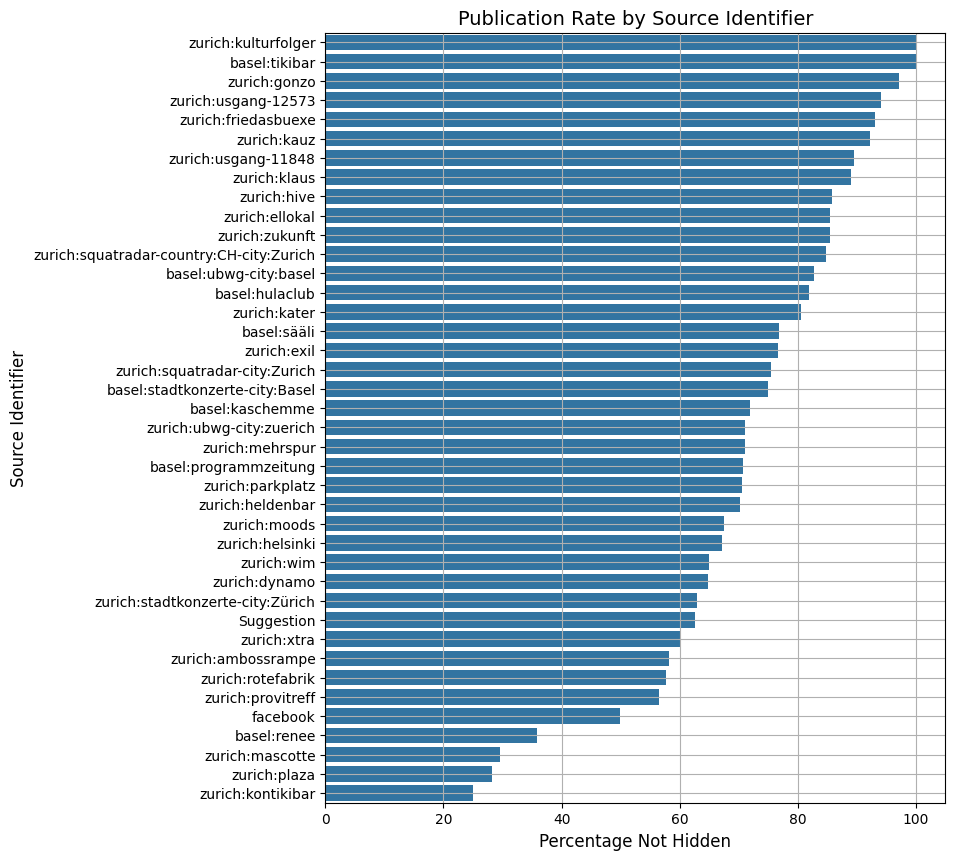

In [18]:
plt.figure(figsize=(8, 10))
sns.barplot(data=percent_not_hidden, x='percentNotHidden', y='sourceIdentifier')
plt.xlabel('Percentage Not Hidden', fontsize=12)
plt.ylabel('Source Identifier', fontsize=12)
plt.title('Publication Rate by Source Identifier', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.show()

## Timeseries Plot per Source Identifier

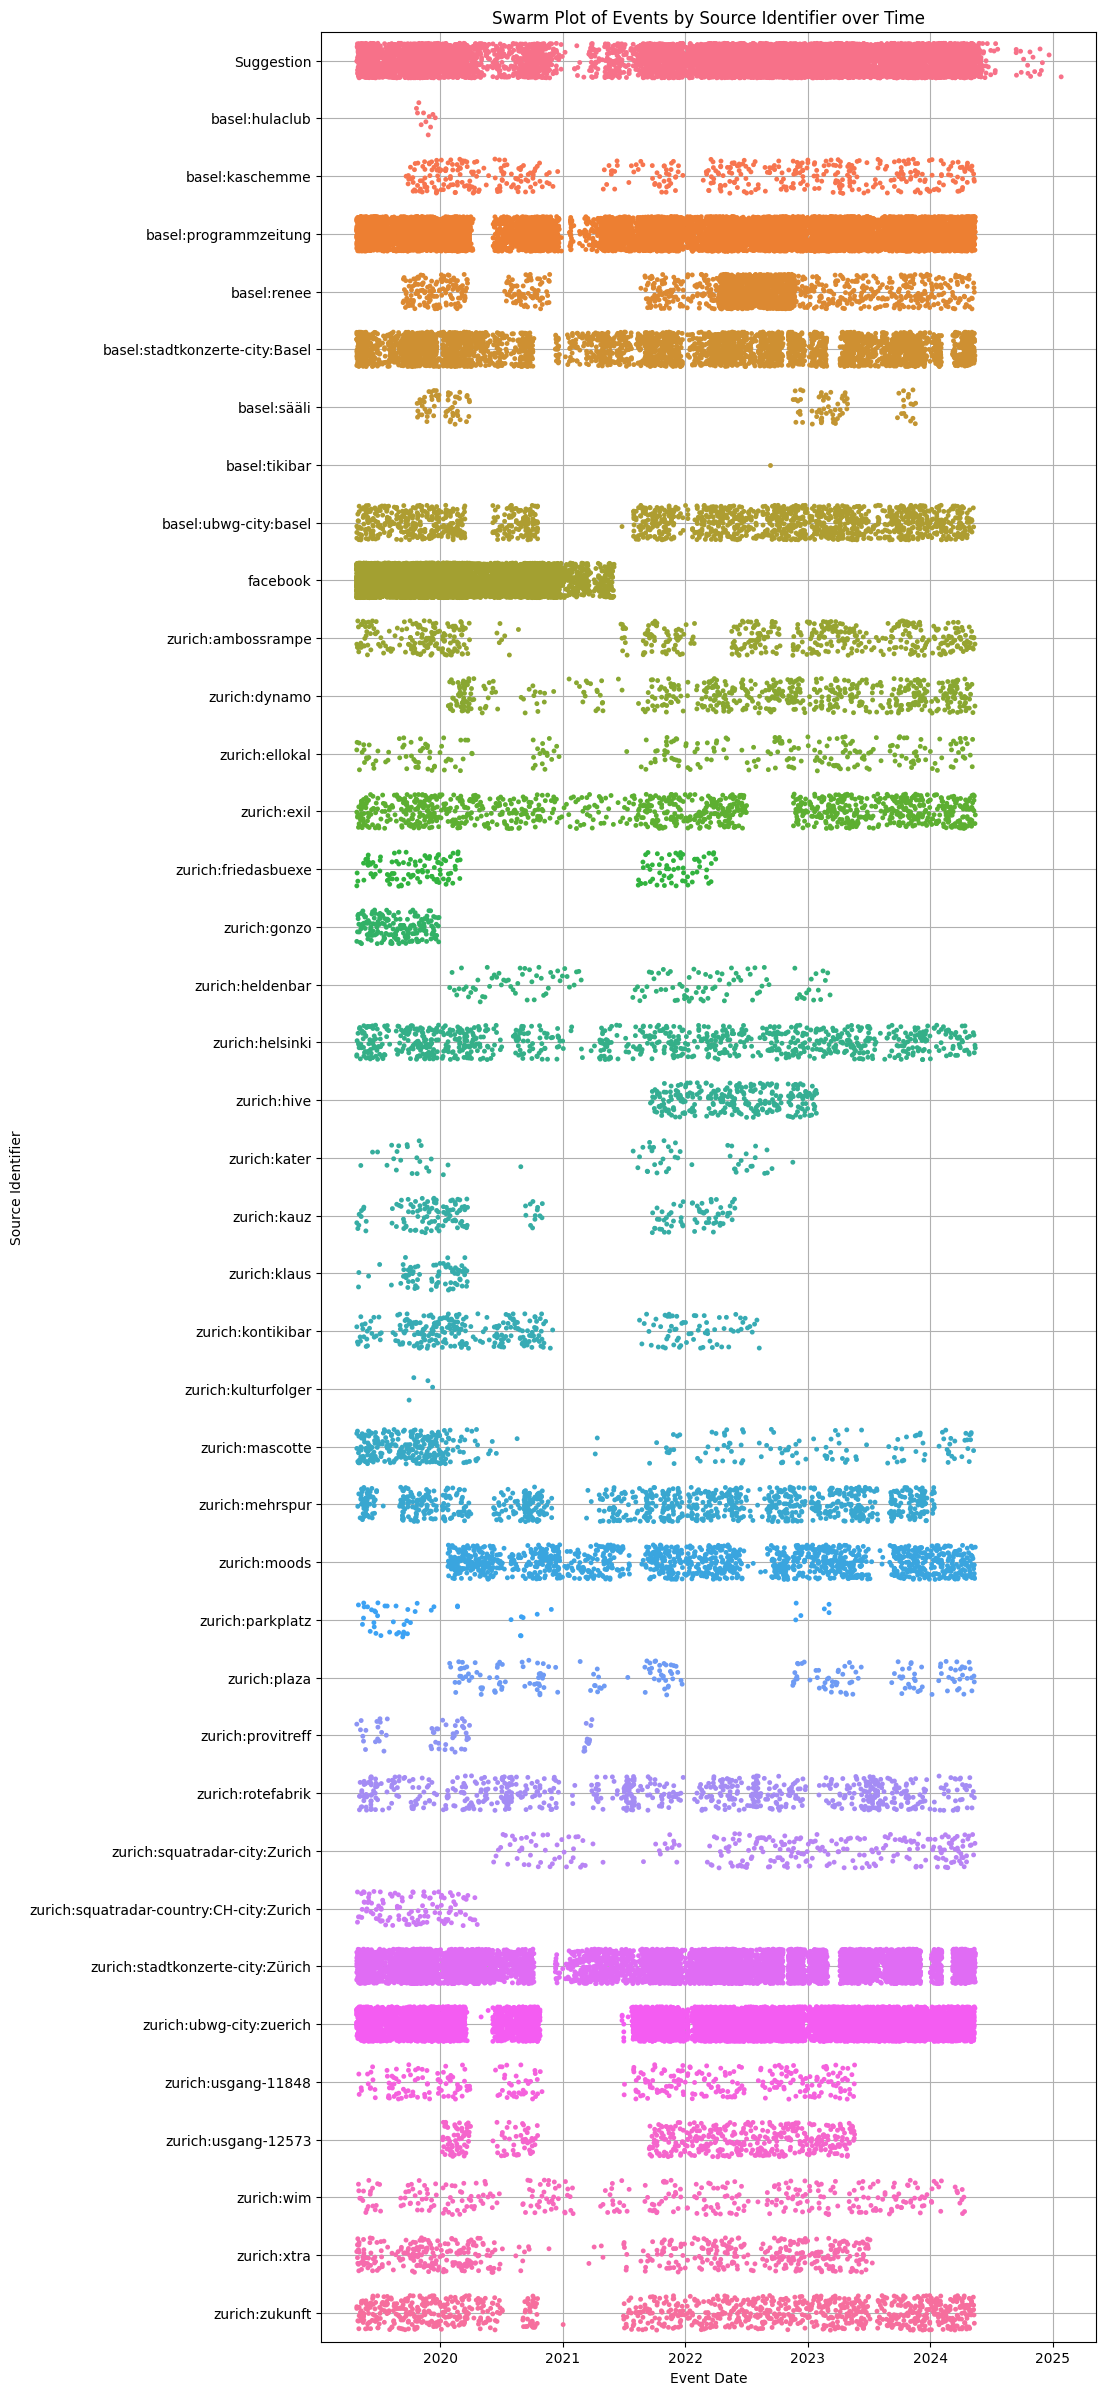

In [19]:
plt.figure(figsize=(10, 30))
sns.stripplot(data=df_merged, x='event_date', y='sourceIdentifier', native_scale=True, jitter=0.3, hue='sourceIdentifier', size=3.5)

plt.title('Swarm Plot of Events by Source Identifier over Time')
plt.xlabel('Event Date')
plt.ylabel('Source Identifier')
plt.grid(True)

plt.show()


#### Add isHidden

In [20]:
df_merged.head()

sourceIdentifier                               eventId          event_date  \
0       Suggestion  000b596a-e587-4227-8dce-046fe1ba662d 2022-01-28 21:00:00   
1       Suggestion  0019543a-5039-48e6-9abc-0001bc8e110e 2022-09-02 18:00:00   
2       Suggestion  001ac810-c904-4d9f-bb81-f9daff15494a 2023-10-19 17:00:00   
3       Suggestion  001af42c-acf0-48df-9393-79152a176dd9 2023-11-23 18:30:00   
4       Suggestion  00202a45-83cb-4e02-90e8-afcfc5508d46 2022-07-02 19:00:00   

                                     id  isHidden  
0  000b596a-e587-4227-8dce-046fe1ba662d     False  
1  0019543a-5039-48e6-9abc-0001bc8e110e     False  
2  001ac810-c904-4d9f-bb81-f9daff15494a      True  
3  001af42c-acf0-48df-9393-79152a176dd9     False  
4  00202a45-83cb-4e02-90e8-afcfc5508d46      True

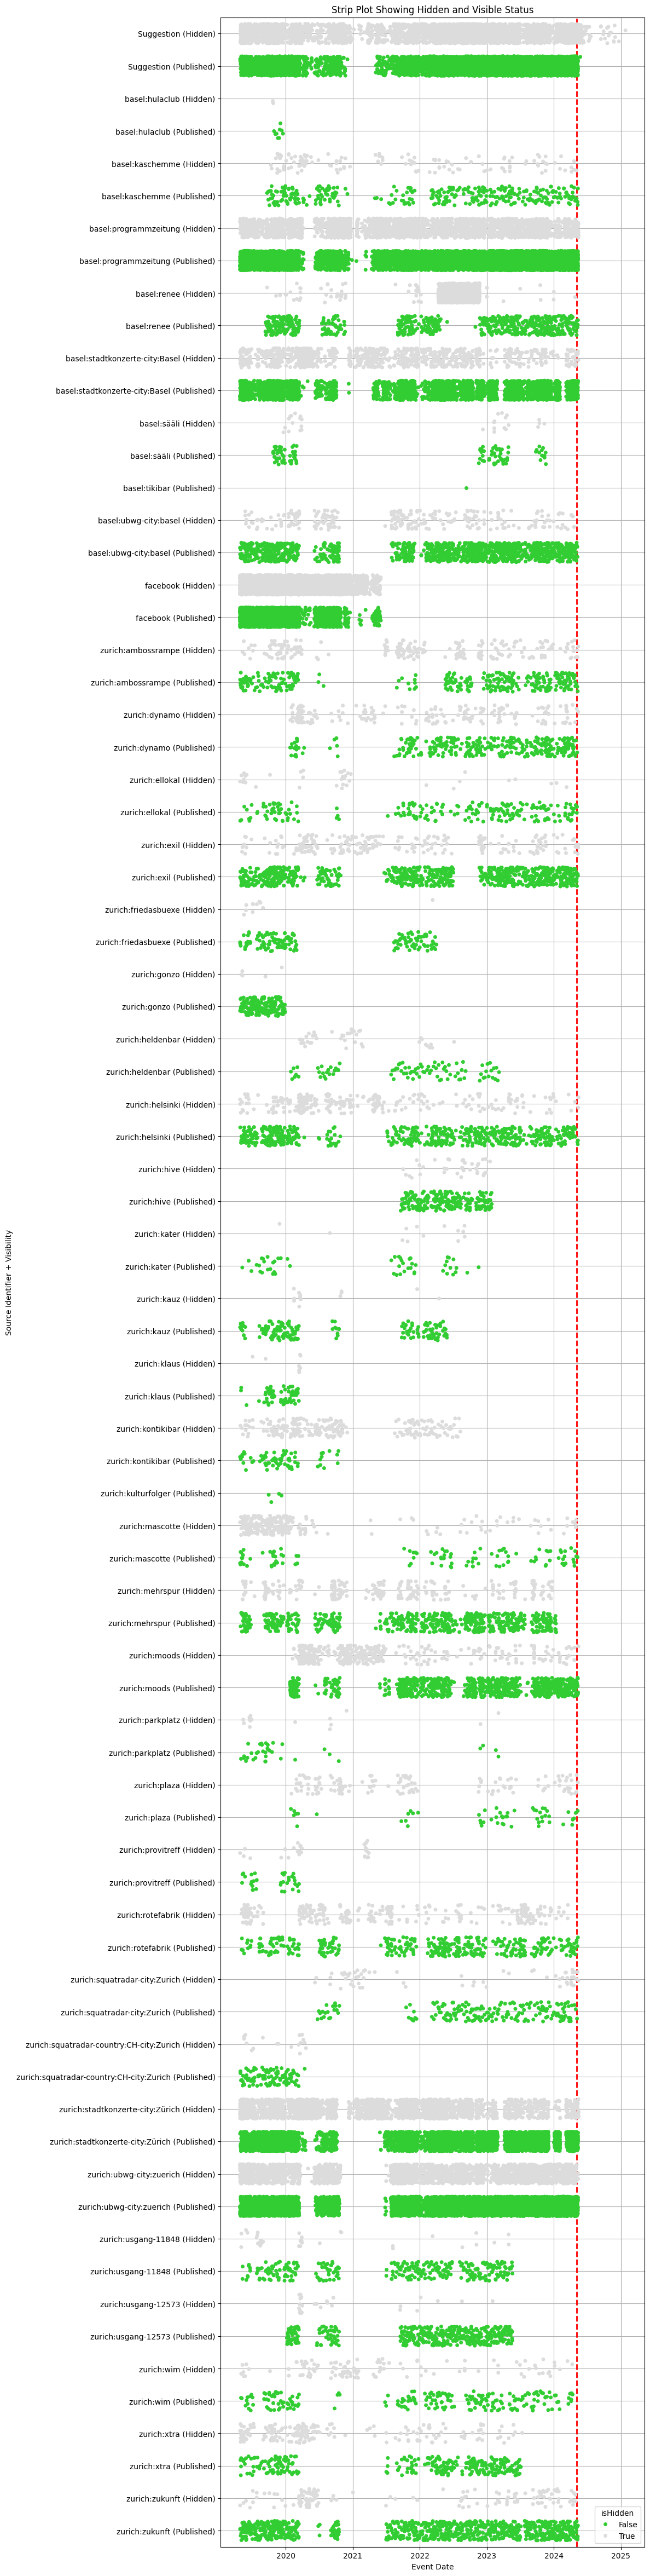

In [25]:
# Create a new column "isHidden"
df_merged['sourceIdentifier_new'] = df_merged['sourceIdentifier'] + ' (' + df_merged['isHidden'].map({True: 'Hidden', False: 'Published'}) + ')'
df_merged = df_merged.sort_values(by='sourceIdentifier_new', ascending=True)

plt.figure(figsize=(10, 60))

sns.stripplot(data=df_merged, x='event_date', y='sourceIdentifier_new', jitter=0.3, hue='isHidden', palette={True: 'gainsboro', False: 'limegreen'})

plt.title('Strip Plot Showing Hidden and Visible Status')
plt.xlabel('Event Date')
plt.ylabel('Source Identifier + Visibility')
plt.grid(True)  # Adding grid for better readability

# Add a vertical line representing today's date
today = pd.to_datetime('today')
plt.axvline(x=today, color='red', linestyle='--', linewidth=2, label='Today')  # Add the vertical line at today's date

plt.show()